In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
data=pd.read_csv('tv_shows.csv')

In [3]:
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [5]:
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].str.rstrip('%').astype('float')

In [6]:
data["Age"] = data["Age"].str.replace("+","")

In [7]:
data['Age'] = pd.to_numeric(data['Age'],errors='coerce')

In [8]:
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18.0,9.5,96.0,1,0,0,0,1
1,1,Stranger Things,2016,16.0,8.8,93.0,1,0,0,0,1
2,2,Money Heist,2017,18.0,8.4,91.0,1,0,0,0,1
3,3,Sherlock,2010,16.0,9.1,78.0,1,0,0,0,1
4,4,Better Call Saul,2015,18.0,8.7,97.0,1,0,0,0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              2620 non-null   float64
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   float64
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 482.3+ KB


<ipython-input-10-1eb500f812de>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Year"],kde=False, color="blue")


<Axes: xlabel='Year'>

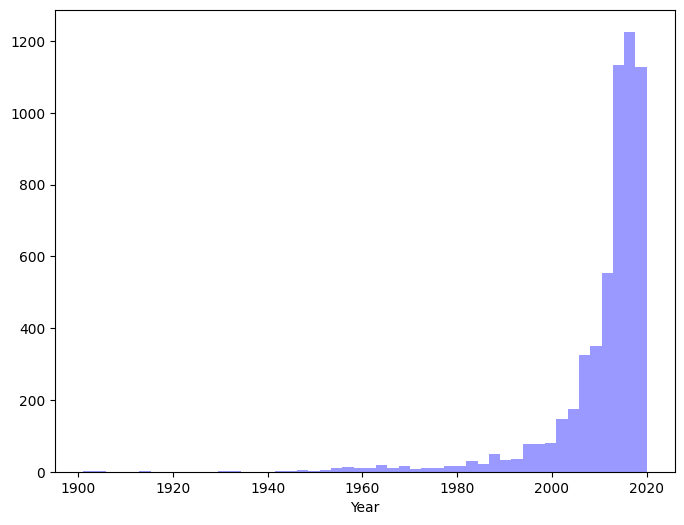

In [10]:
#overall year of release analysis

plt.subplots(figsize=(8,6))
sns.distplot(data["Year"],kde=False, color="blue")

<ipython-input-11-7f5070ffa5c7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"],kde=False, color="red")


<Axes: xlabel='Age'>

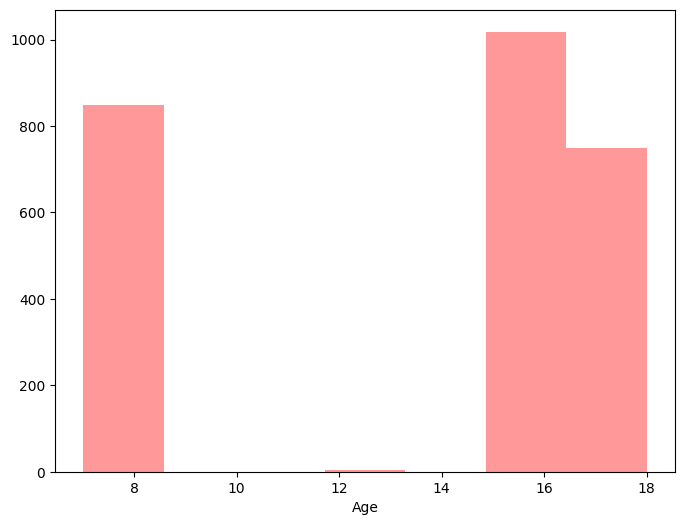

In [11]:
#overall year of release analysis

plt.subplots(figsize=(8,6))
sns.distplot(data["Age"],kde=False, color="red")

In [12]:
print("TV Shows with highest IMDb ratings are= ")
print((data.sort_values("IMDb",ascending=False).head(20))['Title'])

TV Shows with highest IMDb ratings are= 
3023                             Destiny
0                           Breaking Bad
3747                        Malgudi Days
3177                        Hungry Henry
3567                    Band of Brothers
2365                 The Joy of Painting
4128                      Green Paradise
91                            Our Planet
3566                            The Wire
325                              Ramayan
1931                      Rick and Morty
4041                     Everyday Driver
3701                            Baseball
282                      Yeh Meri Family
3798                             The Bay
4257                  Single and Anxious
3568                        The Sopranos
4029             Harmony with A R Rahman
9             Avatar: The Last Airbender
15      Fullmetal Alchemist: Brotherhood
Name: Title, dtype: object


<Axes: xlabel='IMDb', ylabel='Title'>

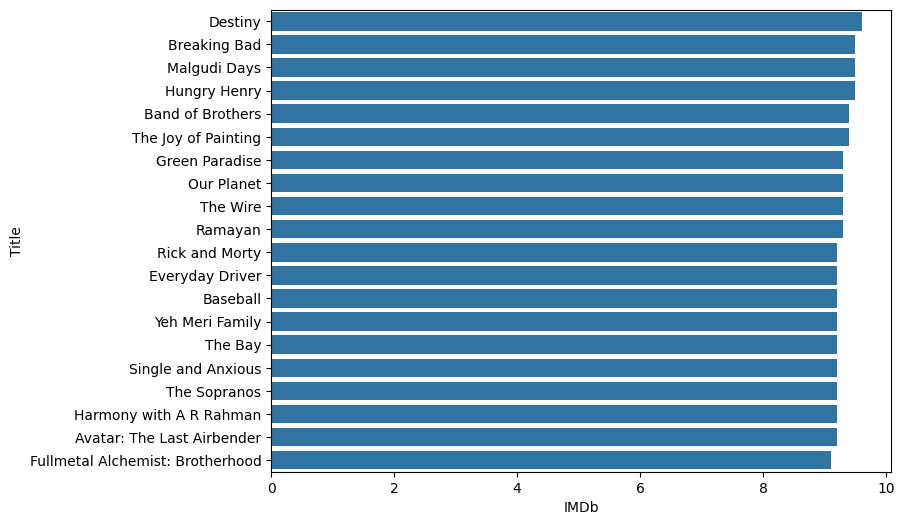

In [13]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= data.sort_values("IMDb",ascending=False).head(20))

In [14]:
print("TV Shows with lowest IMDb ratings are= ")
print((data.sort_values("IMDb",ascending=True).head(20))['Title'])

TV Shows with lowest IMDb ratings are= 
1807                                        Be With You
2999                     A Little Late with Lilly Singh
3104                                  Toddlers & Tiaras
1818                                   Game Winning Hit
3144                                  My Super Sweet 16
3145                                       The Proposal
3060    The High Fructose Adventures of Annoying Orange
3292                                   Underworld, Inc.
1498                                       The Goop Lab
4551                                       Strange Love
3309                                      AwesomenessTV
3143                                       Breadwinners
734                                              Ben 10
3048                                         Metástasis
3265                                           The View
1731                                           Bromance
4653                                        The Z Virus
1866    

<Axes: xlabel='IMDb', ylabel='Title'>

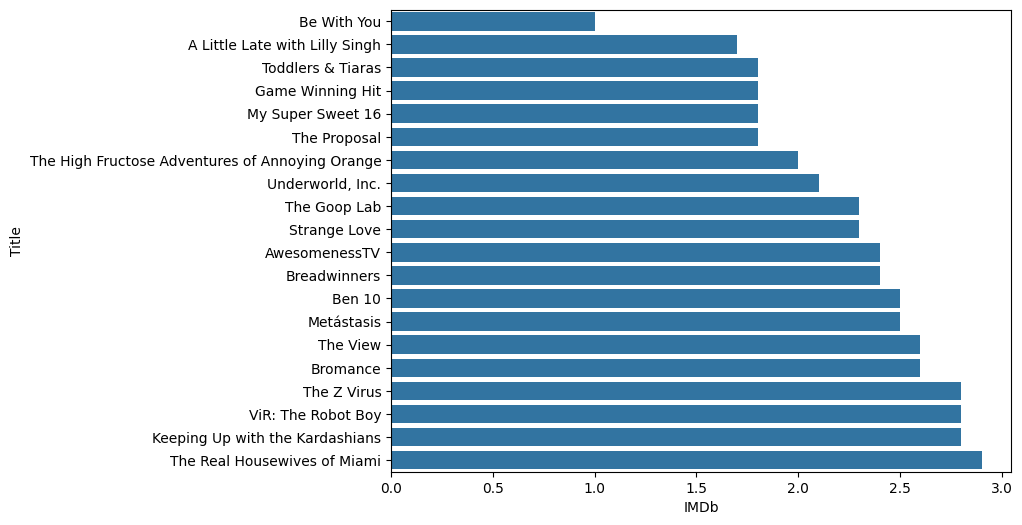

In [15]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= data.sort_values("IMDb",ascending=True).head(20))

In [16]:
#Rottentomatoscores

print("TV Shows with highest Rotten Tomatoes scores are= ")
print((data.sort_values("Rotten Tomatoes",ascending=False).head(20))['Title'])

TV Shows with highest Rotten Tomatoes scores are= 
351       Green Eggs and Ham
3574                 Fleabag
2908      Sherman's Showcase
92                 Big Mouth
1956        My Hero Academia
245           Better Than Us
89                     Fauda
2927          Flirty Dancing
352     The Confession Tapes
2119            Afro Samurai
2116                Bunheads
1948           Gravity Falls
256      The Innocence Files
2016              Elfen Lied
2101             Home Movies
287               The Hollow
2097             Invader Zim
75            Master of None
2073        The Mighty Boosh
1214       The Comedy Lineup
Name: Title, dtype: object


<Axes: xlabel='Rotten Tomatoes', ylabel='Title'>

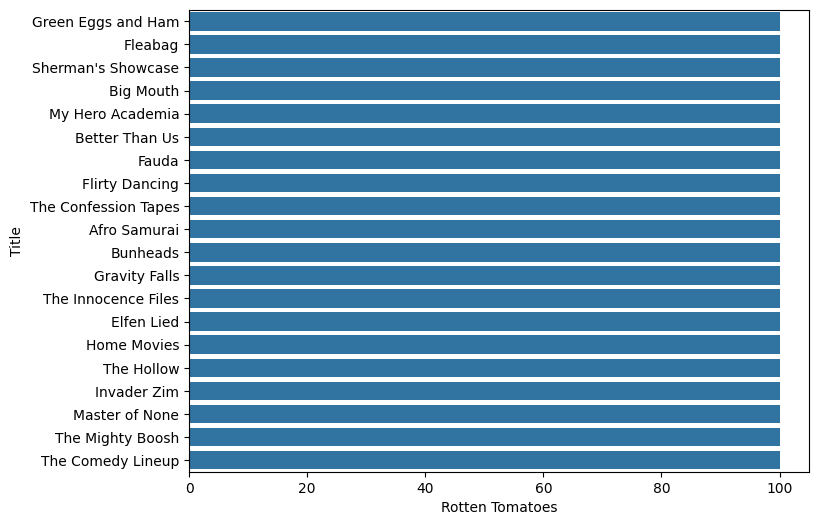

In [17]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="Rotten Tomatoes", y="Title" , data= data.sort_values("Rotten Tomatoes",ascending=False).head(20))

In [18]:
print("TV Shows with lowest Rotten Tomatoes scores are= ")
print((data.sort_values("Rotten Tomatoes",ascending=True).head(20))['Title'])

TV Shows with lowest Rotten Tomatoes scores are= 
630                             Another Life
840                               The I-Land
2958    Saved by the Bell: The College Years
2540                                Rosewood
5506                       Marvel's Inhumans
322                               Insatiable
2585                                  Damien
3881                               The Bible
4196                            Flash Gordon
2625            The Four: Battle for Stardom
1426                            Pacific Heat
3948                    Crisis in Six Scenes
3061                                   .hack
3895                            Texas Rising
687                               Disjointed
1507                                Westside
4159                              18 to Life
2308                              Outsourced
3005                                 Man Up!
598                                  Between
Name: Title, dtype: object


<Axes: xlabel='Rotten Tomatoes', ylabel='Title'>

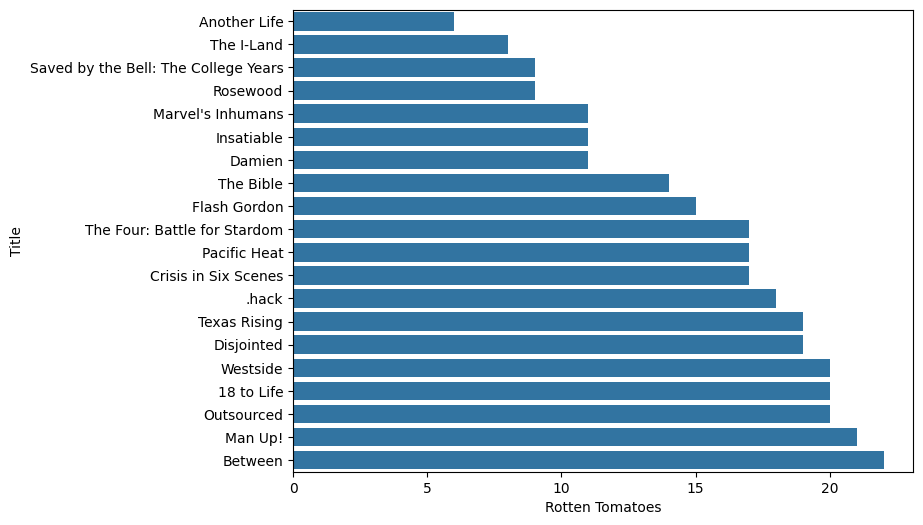

In [19]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="Rotten Tomatoes", y="Title" , data= data.sort_values("Rotten Tomatoes",ascending=True).head(20))

In [20]:
#Netflix
#For sake of simplicity we will work with just Netflix TV Shows
#If necessary, by changing conditions, we can analyze Hulu, Disney and Amazon as well.

#selecting netflix shows
netflix=data[data["Netflix"]==1]

In [21]:
print("Number of shows on Netflix= ", len(netflix))

Number of shows on Netflix=  1931


<ipython-input-22-292eda3e2af0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix["Year"],kde=False, color="blue")


<Axes: xlabel='Year'>

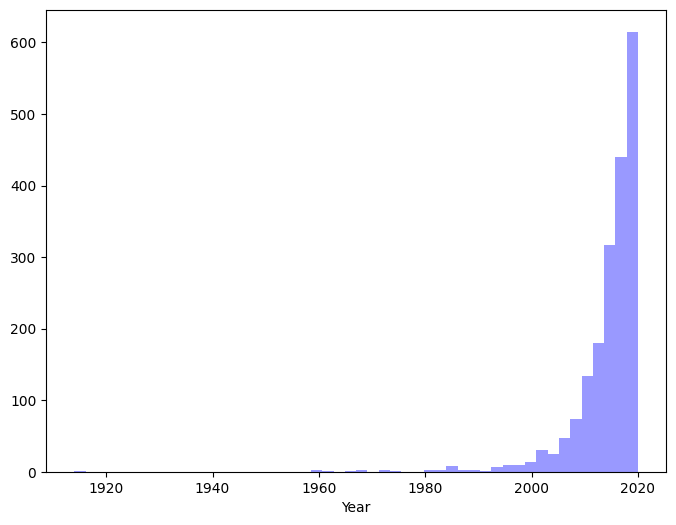

In [22]:
plt.subplots(figsize=(8,6))
sns.distplot(netflix["Year"],kde=False, color="blue")

<ipython-input-23-14ee407f30bb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix["IMDb"],kde=False, color="blue")


<Axes: xlabel='IMDb'>

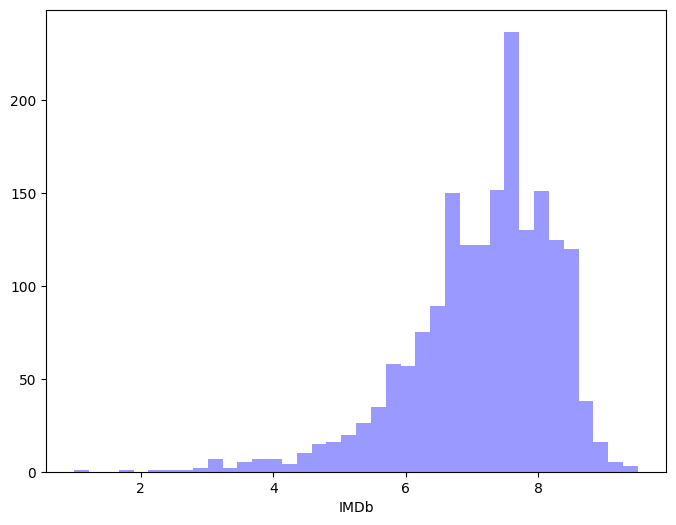

In [23]:
plt.subplots(figsize=(8,6))
sns.distplot(netflix["IMDb"],kde=False, color="blue")

<ipython-input-24-953489157247>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix["Rotten Tomatoes"],kde=False, color="red")


<Axes: xlabel='Rotten Tomatoes'>

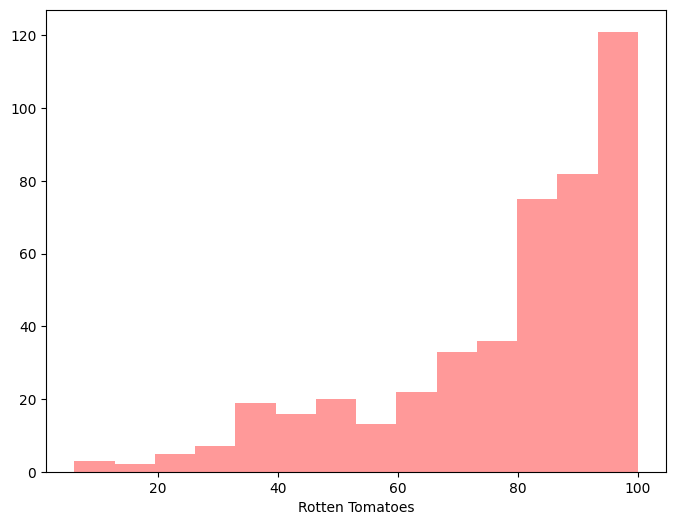

In [24]:
plt.subplots(figsize=(8,6))
sns.distplot(netflix["Rotten Tomatoes"],kde=False, color="red")

In [25]:
print("Netflix Shows with highest IMDb ratings are= ")
print((netflix.sort_values("IMDb",ascending=False).head(10))['Title'])

Netflix Shows with highest IMDb ratings are= 
0                          Breaking Bad
325                             Ramayan
91                           Our Planet
282                     Yeh Meri Family
9            Avatar: The Last Airbender
3                              Sherlock
97                      The Vietnam War
15     Fullmetal Alchemist: Brotherhood
612                  Zindagi Gulzar Hai
341                              Africa
Name: Title, dtype: object


In [26]:
print("Netflix Shows with lowest IMDb ratings are= ")
print((netflix.sort_values("IMDb",ascending=True).head(10))['Title'])

Netflix Shows with lowest IMDb ratings are= 
1807           Be With You
1818      Game Winning Hit
1498          The Goop Lab
734                 Ben 10
1731              Bromance
1866    ViR: The Robot Boy
1872           For the Win
1789                   阳关道
1025          The Bachelor
1820              Shopkins
Name: Title, dtype: object


In [27]:
print("Netflix Shows with highest Rotten Tomatoes score are= ")
print((netflix.sort_values("Rotten Tomatoes",ascending=False).head(10))['Title'])

Netflix Shows with highest Rotten Tomatoes score are= 
256            The Innocence Files
285                        Flowers
227                    Chewing Gum
230                      The Order
238    Voltron: Legendary Defender
245                 Better Than Us
274                    Secret City
275    Abstract: The Art of Design
287                     The Hollow
222                      Imposters
Name: Title, dtype: object


In [28]:
print("Netflix Shows with lowest Rotten Tomatoes score are= ")
print((netflix.sort_values("Rotten Tomatoes",ascending=True).head(10))['Title'])

Netflix Shows with lowest Rotten Tomatoes score are= 
630               Another Life
840                 The I-Land
322                 Insatiable
1426              Pacific Heat
687                 Disjointed
1507                  Westside
598                    Between
834                      Valor
643     The Mysteries of Laura
426       Friends from College
Name: Title, dtype: object


In [29]:
#Top Netflix Shows WordCloud based on IMDb rating
#Taking the title and rating data

netflix1=netflix.sort_values("IMDb",ascending=False).head(100)[['Title',"IMDb"]]
netflix1.head()

,Title,IMDb
0,Breaking Bad,9.5
325,Ramayan,9.3
91,Our Planet,9.3
282,Yeh Meri Family,9.2
9,Avatar: The Last Airbender,9.2


In [30]:
#Converting it into a tuple

tuples_netflix_imdb = [tuple(x) for x in netflix1.values]

In [31]:
#Looks like this

tuples_netflix_imdb[0:10]

[('Breaking Bad', 9.5),
 ('Ramayan', 9.3),
 ('Our Planet', 9.3),
 ('Yeh Meri Family', 9.2),
 ('Avatar: The Last Airbender', 9.2),
 ('Sherlock', 9.1),
 ('The Vietnam War', 9.1),
 ('Fullmetal Alchemist: Brotherhood', 9.1),
 ('Zindagi Gulzar Hai', 9.0),
 ('Africa', 9.0)]

In [32]:
#Top Netflix Shows WordCloud based on Rotten Tomatoes score
#Taking the title value and Rotten Tomatoes Score

netflix2=netflix.sort_values("Rotten Tomatoes",ascending=False).head(100)[['Title',"Rotten Tomatoes"]]
netflix2.head()

,Title,Rotten Tomatoes
256,The Innocence Files,100.0
285,Flowers,100.0
227,Chewing Gum,100.0
230,The Order,100.0
238,Voltron: Legendary Defender,100.0


In [33]:
#Converting to Tuple

tuples_netflix_tomatoes = [tuple(x) for x in netflix2.values]

In [34]:
#TV Show Clustering based on ratings
#Taking the relevant data

ratings=data[["Title",'IMDb',"Rotten Tomatoes"]]
ratings.head()

,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,9.5,96.0
1,Stranger Things,8.8,93.0
2,Money Heist,8.4,91.0
3,Sherlock,9.1,78.0
4,Better Call Saul,8.7,97.0


In [35]:
len(ratings)

5611

In [36]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   IMDb             4450 non-null   float64
 2   Rotten Tomatoes  1011 non-null   float64
dtypes: float64(2), object(1)
memory usage: 131.6+ KB


In [37]:
#Removing the data

ratings=ratings.dropna()

In [38]:
ratings["IMDb"]=ratings["IMDb"]*10

In [39]:
#New data

ratings.head()

,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,95.0,96.0
1,Stranger Things,88.0,93.0
2,Money Heist,84.0,91.0
3,Sherlock,91.0,78.0
4,Better Call Saul,87.0,97.0


In [40]:
#Input data

X=ratings[["IMDb","Rotten Tomatoes"]]

In [41]:
X.head()

,IMDb,Rotten Tomatoes
0,95.0,96.0
1,88.0,93.0
2,84.0,91.0
3,91.0,78.0
4,87.0,97.0


In [50]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
km.fit(X)
y=km.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [52]:

#adding the labels to a column named label

ratings["label"] = y

In [54]:
#The new dataframe with the clustering done

ratings.head()

,Title,IMDb,Rotten Tomatoes,label
0,Breaking Bad,95.0,96.0,4
1,Stranger Things,88.0,93.0,4
2,Money Heist,84.0,91.0,4
3,Sherlock,91.0,78.0,7
4,Better Call Saul,87.0,97.0,4


<ipython-input-55-eb6ae2977275>:4: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = 'IMDb',y = 'Rotten Tomatoes',hue="label",


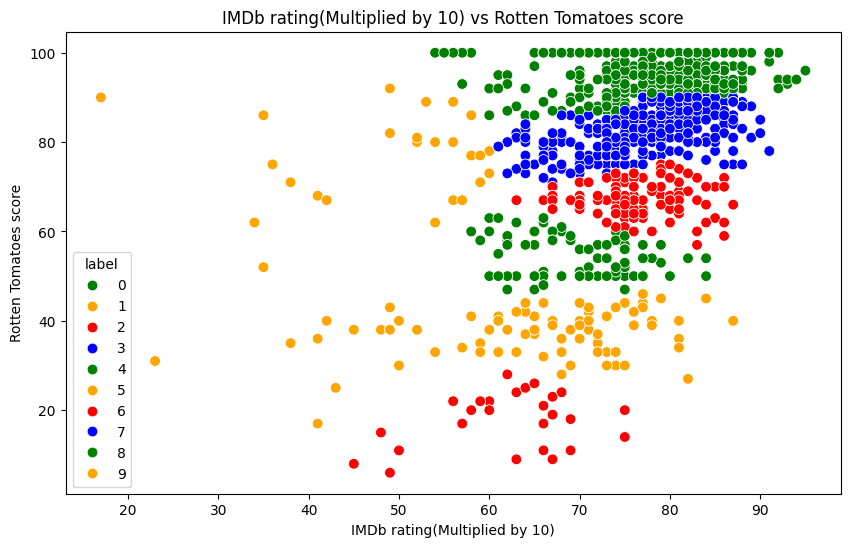

In [55]:
#Scatterplot of the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IMDb',y = 'Rotten Tomatoes',hue="label",
                 palette=['green','orange','red',"blue"], legend='full',data = ratings  ,s = 60 )

plt.xlabel('IMDb rating(Multiplied by 10)')
plt.ylabel('Rotten Tomatoes score')
plt.title('IMDb rating(Multiplied by 10) vs Rotten Tomatoes score')
plt.show()

In [56]:
print('Number of Cluster 0 TV Shows are=')
print(len(ratings[ratings["label"]==0]))
print("--------------------------------------------")
print('Number of Cluster 1 TV Shows are=')
print(len(ratings[ratings["label"]==1]))
print("--------------------------------------------")
print('Number of Cluster 2 TV Shows are=')
print(len(ratings[ratings["label"]==2]))
print("--------------------------------------------")
print('Number of Cluster 3 TV Shows are=')
print(len(ratings[ratings["label"]==3]))
print("--------------------------------------------")

Number of Cluster 0 TV Shows are=
110
--------------------------------------------
Number of Cluster 1 TV Shows are=
63
--------------------------------------------
Number of Cluster 2 TV Shows are=
114
--------------------------------------------
Number of Cluster 3 TV Shows are=
141
--------------------------------------------


In [57]:
#FINAL_RESULTS
print('TV Shows in cluster 0')

print(ratings[ratings["label"]==0]["Title"].values)

TV Shows in cluster 0
["Marvel's Agents of S.H.I.E.L.D." "DC's Legends of Tomorrow" 'Colony'
 "Marvel's Luke Cage" 'Dark Matter' 'The Stranger' 'The 4400' 'Feel Good'
 'Supergirl' 'Wynonna Earp' 'The Order' 'Marianne' 'Better Than Us'
 'She-Ra and the Princesses of Power' 'Nailed It!' 'Secret City'
 'The Devil Next Door' 'The Hollow' 'Black Lightning' 'No Tomorrow'
 'Surviving R. Kelly' 'Easy' '1983' 'The Confession Tapes' 'The Chalet'
 'The Confession Killer' 'Battle Creek' 'Special' 'Dear White People'
 'White Gold' 'Crazyhead' "It's Bruno!" 'Gentefied' 'Wormwood'
 'Tuca & Bertie' 'Mr. Iglesias' 'Hot Girls Wanted: Turned On' 'Cleverman'
 'Rhythm + Flow' 'Seis Manos' 'Lady Dynamite' 'W/ Bob & David'
 'Queen Sono' 'The Code' 'The New Legends of Monkey' 'The Letdown'
 'I Think You Should Leave with Tim Robinson' 'The Standups'
 'The Windsors' 'Dating Around' 'Man to Man'
 'Final Fantasy XIV: Dad of Light' 'The Honeymoon Stand Up Special'
 'The Comedy Lineup' 'Blue Bloods' 'Timeless' 'Ev

In [58]:
print('TV Shows in cluster 1')

print(ratings[ratings["label"]==1]["Title"].values)

TV Shows in cluster 1
['NCIS' '13 Reasons Why' 'Messiah' 'The Originals' 'Heartland'
 "Marvel's Iron Fist" 'Shooter' '3%' 'Hemlock Grove' 'The Black Donnellys'
 'The Night Shift' 'Bordertown' 'Fuller House' 'Gypsy' 'Lovesick' 'Taken'
 'Paradise PD' 'October Faction' 'Flaked' 'Girlboss' 'Nightflyers'
 'Norm Macdonald Has a Show' 'Turn Up Charlie' 'Selection Day' 'HAPPYish'
 'Chambers' 'Rebellion' 'Life Sentence' 'Taxi Brooklyn' 'Soundtrack'
 'Marseille' 'The Big Flower Fight' 'Chelsea' 'Behind Enemy Lines'
 'Footprints' 'Legend of the Seeker' 'New Amsterdam'
 'Battlestar Galactica' 'Reprisal' 'Breakout Kings'
 'Lincoln Rhyme: Hunt for the Bone Collector' 'The Purge' 'The Firm'
 'Four Weddings and a Funeral' 'Deputy' 'Shut Eye' 'Light as a Feather'
 'Dice' 'Bluff City Law' 'Intruders' 'Reef Break'
 'Criminal Minds: Suspect Behavior' 'The Weekly' 'Bedlam'
 'High School USA!' 'Salvation' 'Lucky Louie' 'Hand of God'
 'The Last Tycoon' 'Titanic' 'Accidentally on Purpose'
 'Great Expectations

In [59]:
print('TV Shows in cluster 2')

print(ratings[ratings["label"]==2]["Title"].values)

TV Shows in cluster 2
['Dexter' 'The Witcher' 'After Life' 'Family Guy' 'Altered Carbon'
 "Marvel's The Punisher" 'Waco' 'Outer Banks' 'Anne with an E' 'Weeds'
 'Locke & Key' 'The Tudors' 'Marco Polo' 'Designated Survivor'
 'Hell on Wheels' 'Haven' 'Queen of the South' 'Bloodline'
 "Don't F**k with Cats: Hunting an Internet Killer" 'Lost Girl'
 'Disenchantment' 'Madam Secretary' 'Lilyhammer' 'Versailles'
 'Everything Sucks!' 'Marcella' 'Spinning Out' 'Derek' 'Mars' 'Daybreak'
 'Bonding' "I'm Sorry" 'The English Game' 'Dirty John' 'Dark Tourist'
 'The Innocent Man' 'Damnation' 'The Eddy' "Dolly Parton's Heartstrings"
 'Traitors' 'The Last Czars' 'Family Reunion' 'Captive' 'Babies'
 'Prison Break' 'The Killing' 'The Orville' 'Desperate Housewives'
 'Revenge' 'The Rookie' 'DAVE' "Zoey's Extraordinary Playlist" 'Dollhouse'
 'Rizzoli & Isles' 'Stargate Universe' 'Wayward Pines' 'Genius'
 'Pinky and the Brain' "The Hitchhiker's Guide to the Galaxy"
 'Witches of East End' "RuPaul's Drag Race 

In [60]:
print('TV Shows in cluster 3')

print(ratings[ratings["label"]==3]["Title"].values)

TV Shows in cluster 3
["Grey's Anatomy" 'Pretty Little Liars' 'The Umbrella Academy'
 'Once Upon a Time' 'Riverdale' 'Gotham' 'Gossip Girl' 'Lost in Space'
 'Charmed' 'Into the Night' 'Hawaii Five-0' "Marvel's The Defenders"
 'Star Trek: Voyager' 'The Shannara Chronicles' 'Hart of Dixie'
 'Living with Yourself' 'Nurse Jackie' 'Glee' 'Helix' 'Safe' 'Evil Genius'
 'Glitch' 'GHOUL' 'The Society' 'Dracula' 'Quantico' 'Raising Dion'
 'The Rain' 'Baby' 'The Circle' 'Frontier' 'Frequency' 'Seven Seconds'
 'Killer Inside: The Mind of Aaron Hernandez' 'Zoo'
 'Self Made: Inspired by the Life of Madam C.J. Walker'
 'The Frankenstein Chronicles' 'Wu Assassins' 'Collateral' 'Bad Blood'
 'Aquarius' 'Black Summer' 'The Great Train Robbery' 'Devilman: Crybaby'
 'Great News' 'Watership Down' 'The Innocents' 'Rotten' 'Requiem'
 'Power Rangers' 'The Family' 'The Trial' 'How to Fix a Drug Scandal'
 "She's Gotta Have It" 'Black Earth Rising' 'Tidying Up with Marie Kondo'
 'Cooked With Cannabis' 'The Joel M